## VGG 16

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/amasetti/AI-Portfolio-Examples/blob/master/3.%20VGG-16/main.ipynb)


VGG16 is a deep convolutional neural network architecture that was introduced by the Visual Geometry Group (VGG) at the University of Oxford. 

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

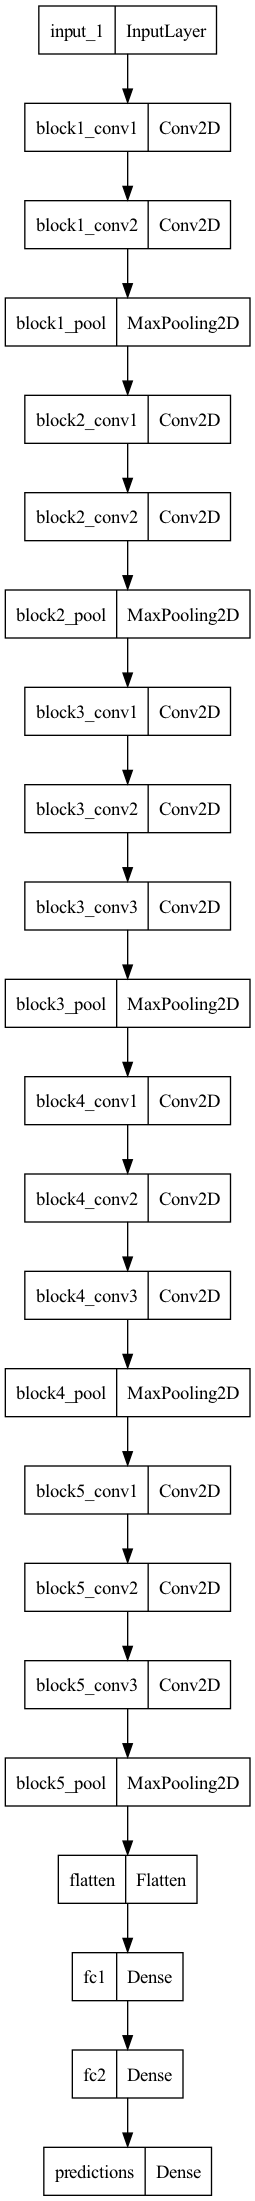

In [2]:
from keras.utils import plot_model
plot_model(model, to_file='vgg.png')

## Inference

1/1 [==============================] - 0s 230ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


golden_retriever (88.68%)


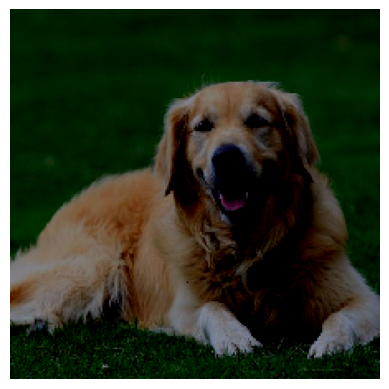

In [22]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions


# load an image from file
image = load_img('golden.jpeg', target_size=(224, 224))

# convert the image pixels to a numpy array
image_arr = img_to_array(image)

# reshape data for the model
image = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

# Plot the image
plt.imshow(image_arr.astype(int))
plt.axis('off')  # Remove axes
plt.show()

## Feature Maps

In convolutional neural networks (CNNs), each convolutional layer consists of multiple filters or kernels that learn to detect different patterns and features at different spatial locations in the input. The output feature maps are obtained by convolving these filters with the input image, resulting in feature maps that highlight regions in the input that are particularly relevant to those filters.

By visualizing these feature maps, we can gain insights into what kind of patterns and features the filters in the third convolutional layer of VGG16 are capturing from the input image. Each subplot in the grid represents an individual feature map, showing the response of that specific filter to the input image. The grayscale intensity in each subplot indicates the level of activation or response of that filter at different spatial locations.

1/1 [==============================] - 0s 23ms/step


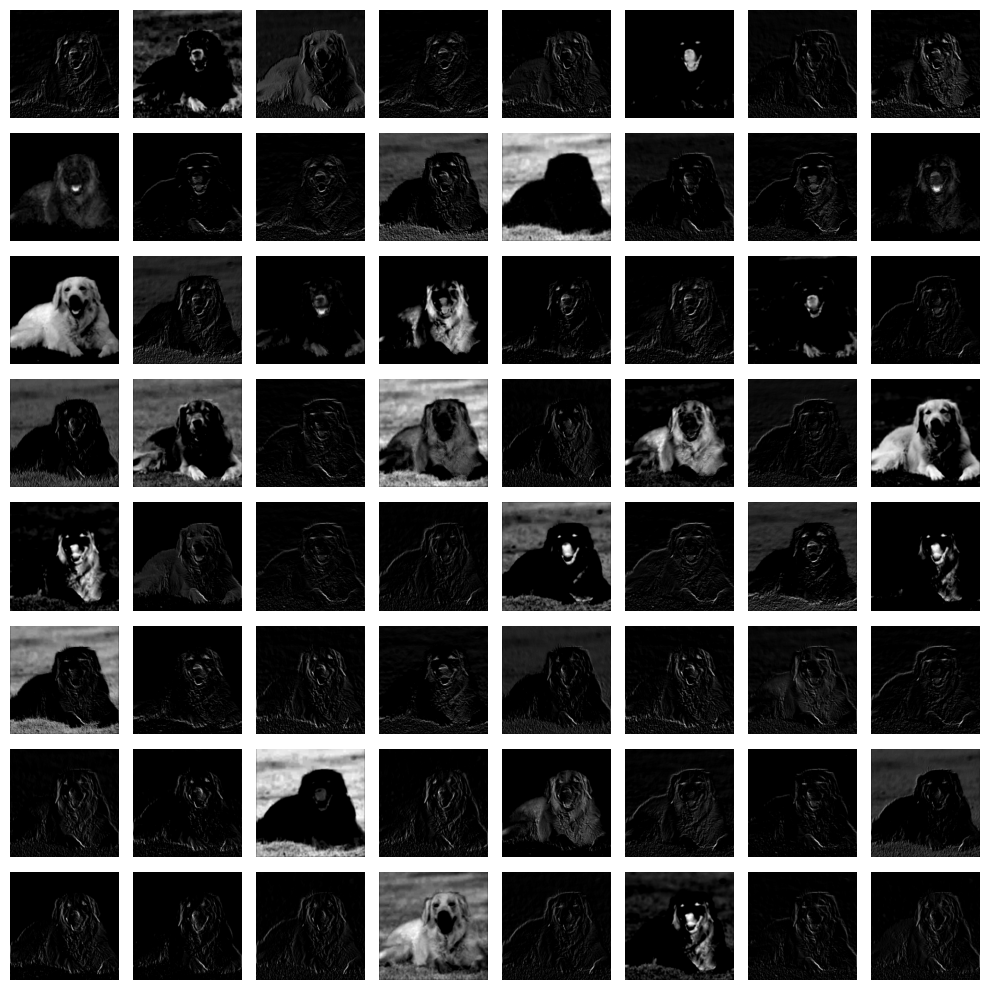

In [28]:
import math
from keras.models import Model


# Get the output of the third convolutional layer
layer_name = 'block1_conv1'
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)


# Predict the probability across all output classes
conv_output = intermediate_layer_model.predict(image)


# Create a grid for displaying the outputs
num_outputs = conv_output.shape[3]
grid_size = math.ceil(math.sqrt(num_outputs))
fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))

# Display each output in the grid
for i in range(grid_size):
    for j in range(grid_size):
        if (i * grid_size + j) < num_outputs:
            axs[i, j].imshow(conv_output[0, :, :, i * grid_size + j], cmap='gray')
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

